# Facebook's Prophet Library

## Importing the data

👇 Go on [trends.google.com](https://trends.google.com/trends/?geo=US) and retrieve the dataset representing the interest over time of the keyword `data science` since 2004 in the US. Once you get the dataset, import the data and display the first few rows

In [12]:
import pandas as pd

df = pd.read_csv("data_science_google_trends.csv")
print(df.head(5))

     Month  data science: (United States)
0  2004-01                             17
1  2004-02                             13
2  2004-03                             11
3  2004-04                              6
4  2004-05                              6


## Display the data

👇Visualize the data by displaying the first few rows of the dataframe

In [ ]:
# Voir ci-dessus

## Data Preprocessing

Facebook'Prophet library requires the data to be in a specific format. 

👇 Format the dataset as per Facebook Prophet's requirements.
Remember the dataframe should have a `ds` and `y` columns

In [13]:
df["ds"] = pd.to_datetime(df["Month"])
df["y"] = df["data science: (United States)"]
df.drop(columns=["Month", "data science: (United States)"], inplace=True)

## Plotting the data

👇 Plot the data

<AxesSubplot: xlabel='ds', ylabel='y'>

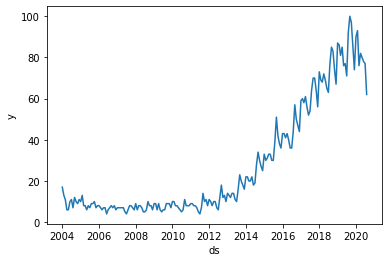

In [16]:
import seaborn as sns

sns.lineplot(df, x=df["ds"], y=df["y"])

## Fitting the data

👇 Fit the data using Facebook's Prophet library. Make sure to use a train/test split

In [19]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 19.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [42]:
from prophet import Prophet
"""split_index = int(len(df) * 0.8 // 1)
df_train = df.iloc[:split_index]
df_test = df.iloc[split_index:]"""

model = Prophet()
model.fit(df)

15:00:09 - cmdstanpy - INFO - Chain [1] start processing
15:00:09 - cmdstanpy - INFO - Chain [1] done processing


## Make future predictions

👇Before predicting future values with Facebook's Prophet library, you first need to create a placeholder dataframe that will eventually hold the predictions. Once you create the dataframe, try to predict 2 years in the future.

You can create the predictions' dataframe using `make_future_dataframe()`

In [43]:
future = model.make_future_dataframe(periods=730) # 730 jours= 2 ans
forecast = model.predict(future)


## Plotting the forecast

👇 It's time to visualize our forecast. Make use of the handy [`model.plot(forecast)`](https://facebook.github.io/prophet/docs/quick_start.html)

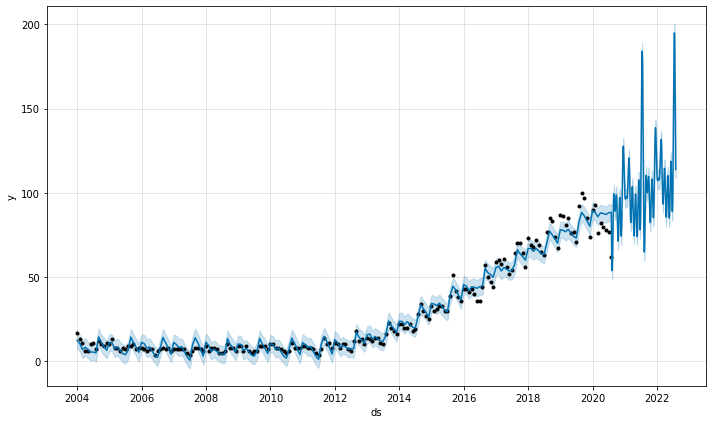

In [44]:
model.plot(forecast);

👉 From 2004 to 2018 we can see the train data and the forecasted data from 2018 to 2020.

We can also notice a shaded region behind the plot which represents the 95% uncertainty interval.

The black dots represent the original data

## Time Series' trend and seasonality

👇 Plot the trend and yearly seasonality of the time series. This can be done using the `plot_components()` function from Facebook's Prophet Library

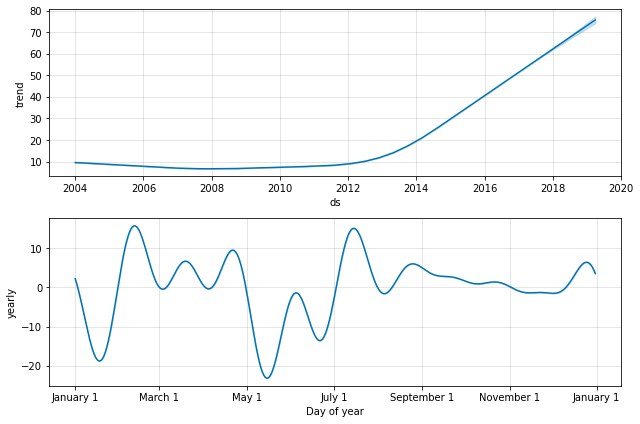

In [41]:
model.plot_components(forecast);

## Evaluating the model with cross-validation!

👇 Using `cross_validation` and `performance_metrics` from [fbprophet.diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html), evaluate the performance of your model
<img src='https://facebook.github.io/prophet/static/diagnostics_files/diagnostics_3_0.png'>

More precisely, create a Time Series K-fold CV with
- train sets of size 5 years
- horizon val sizes of 1 years
- shifting each fold by 180 days

In [53]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

df_cv = cross_validation(model, initial='1825 days', period='180 days', horizon = '365 days')
metrics = performance_metrics(df_cv, metrics=["mae"], rolling_window=1)
mae = metrics.iloc[0]['mae']
print(f"MAE for a one-year horizon: {mae}")


  0%|          | 0/22 [00:00<?, ?it/s]

15:14:37 - cmdstanpy - INFO - Chain [1] start processing
15:14:38 - cmdstanpy - INFO - Chain [1] done processing
15:14:38 - cmdstanpy - INFO - Chain [1] start processing
15:14:38 - cmdstanpy - INFO - Chain [1] done processing
15:14:38 - cmdstanpy - INFO - Chain [1] start processing
15:14:39 - cmdstanpy - INFO - Chain [1] done processing
15:14:39 - cmdstanpy - INFO - Chain [1] start processing
15:14:39 - cmdstanpy - INFO - Chain [1] done processing
15:14:39 - cmdstanpy - INFO - Chain [1] start processing
15:14:40 - cmdstanpy - INFO - Chain [1] done processing
15:14:40 - cmdstanpy - INFO - Chain [1] start processing
15:14:40 - cmdstanpy - INFO - Chain [1] done processing
15:14:40 - cmdstanpy - INFO - Chain [1] start processing
15:14:41 - cmdstanpy - INFO - Chain [1] done processing
15:14:41 - cmdstanpy - INFO - Chain [1] start processing
15:14:41 - cmdstanpy - INFO - Chain [1] done processing
15:14:41 - cmdstanpy - INFO - Chain [1] start processing
15:14:41 - cmdstanpy - INFO - Chain [1]

MAE for a one-year horizon: 4.533337663104278


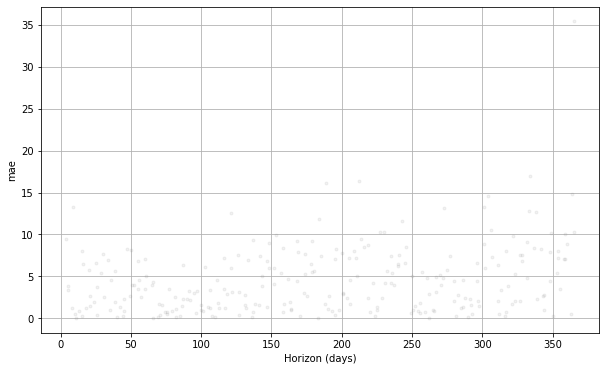

In [54]:
# Plot results below
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, "mae", rolling_window=1);

⚠️ Don't forget to push the challenge to GitHub once you're done 😄